In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
prices = np.loadtxt(r'D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/prices_btc_Jan_11_2020_to_May_22_2020.txt', dtype=float)
print('Number of prices:', len(prices))

Number of prices: 1141281


In [3]:
fig = go.Figure(data=go.Scatter(y=prices[-10000:]))
fig.show()

In [4]:
def buy(btc_price, btc, money):
    if(money != 0):
        btc = (1 / btc_price ) * money
        money = 0
    return btc, money


def sell(btc_price, btc, money):
    if(btc != 0):
        money = btc_price * btc
        btc = 0
    return btc, money


def wait(btc_price, btc, money):
    # do nothing
    return btc, money

In [8]:
np.random.seed(1)

# set of actions that the user could do
actions = { 'buy' : buy, 'sell': sell, 'wait' : wait}

actions_to_nr = { 'buy' : 0, 'sell' : 1, 'wait' : 2 }
nr_to_actions = { k:v for (k,v) in enumerate(actions_to_nr) }

nr_actions = len(actions_to_nr.keys())
nr_states = len(prices)

# q-table = reference table for our agent to select the best action based on the q-value
q_table = np.random.rand(nr_states, nr_actions)

print(nr_actions)
print(nr_states)
print(q_table.shape)

3
1141281
(1141281, 3)


In [ ]:
def get_reward(before_btc, btc, before_money, money):
    reward = 0
    if(btc != 0):
        if(before_btc < btc):
            reward  = 1
    if(money != 0):
        if(before_money < money):
            reward = 1
            
    return reward

In [ ]:
def choose_action(state):
    if np.random.uniform(0, 1) < eps:
        return np.random.randint(0, 2)
    else:
        return np.argmax(q_table[state])

In [ ]:
def take_action(state, action):
    return actions[nr_to_actions[action]](prices[state], btc, money)

In [ ]:
def act(state, action, theta):
    btc, money = theta
    
    done = False
    new_state = state + 1
    
    before_btc, before_money = btc, money
    btc, money = take_action(state, action)
    theta = btc, money
    
    reward = get_reward(before_btc, btc, before_money, money)
    
    if(new_state == nr_states):
        done = True
    
    return new_state, reward, theta, done

In [ ]:
reward = 0
btc = 0
money = 100
theta = btc, money

In [ ]:
# exploratory
eps = 0.3

n_episodes = 20
min_alpha = 0.02

# learning rate for Q learning
alphas = np.linspace(1.0, min_alpha, n_episodes)

# discount factor, used to balance immediate and future reward
gamma = 1.0

In [ ]:
rewards = {}

for e in range(n_episodes):
    
    total_reward = 0
    
    state = 0
    done = False
    alpha = alphas[e]
    
    while(done != True):

        action = choose_action(state)
        next_state, reward, theta, done = act(state, action, theta)
        
        total_reward += reward
        
        if(done):
            rewards[e] = total_reward
            print(f"Episode {e + 1}: total reward -> {total_reward}")
            break
        
        q_table[state][action] = q_table[state][action] + alpha * (reward + gamma *  np.max(q_table[next_state]) - q_table[state][action])

        state = next_state

Episode 1: total reward -> 620440
Episode 2: total reward -> 699087
Episode 3: total reward -> 724375
Episode 4: total reward -> 747267
Episode 5: total reward -> 764115
Episode 6: total reward -> 776896
Episode 7: total reward -> 788167
Episode 8: total reward -> 795288
Episode 9: total reward -> 799318
Episode 10: total reward -> 801008
Episode 11: total reward -> 805395
Episode 12: total reward -> 808962
Episode 13: total reward -> 810367
Episode 14: total reward -> 811362
Episode 15: total reward -> 813103
Episode 16: total reward -> 813193
Episode 17: total reward -> 813072
Episode 18: total reward -> 813205
Episode 19: total reward -> 813811
Episode 20: total reward -> 814285


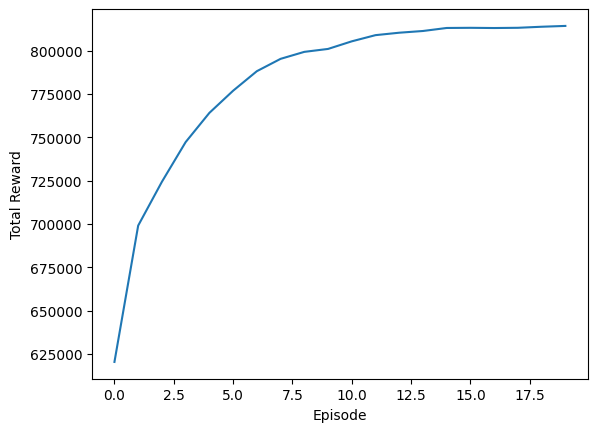

In [ ]:
plt.ylabel('Total Reward')
plt.xlabel('Episode')
plt.plot([rewards[e] for e in rewards.keys()])

In [ ]:
state = 0
acts = np.zeros(nr_states)
done = False

while(done != True):

        action = choose_action(state)
        next_state, reward, theta, done = act(state, action, theta)
        
        acts[state] = action
        
        total_reward += reward
        
        if(done):
            break
            
        state = next_state

In [ ]:
buys_idx = np.where(acts == 0)
wait_idx = np.where(acts == 2)
sell_idx = np.where(acts == 1)

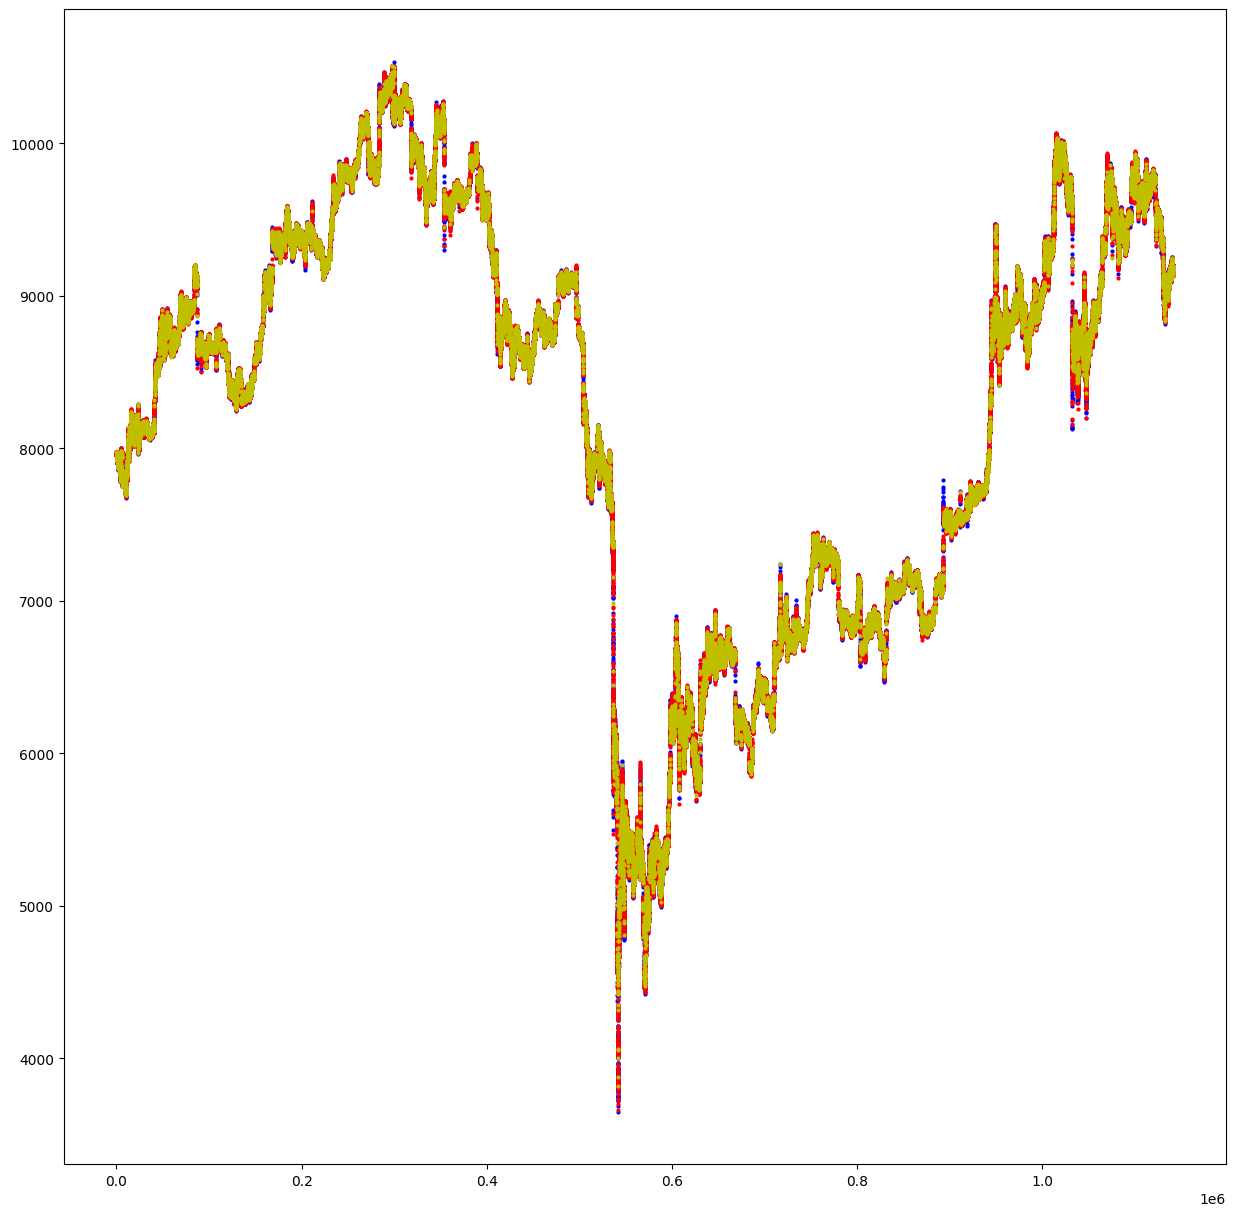

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(buys_idx[0], prices[buys_idx], 'bo', markersize=2)
plt.plot(sell_idx[0], prices[sell_idx], 'ro', markersize=2)
plt.plot(wait_idx[0], prices[wait_idx], 'yo', markersize=2)